# Exploratory Data Analysis (EDA)

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

Dataset: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

## Imports 

In [2]:
import numpy as np
import pandas as pd
import cv2
import glob
import seaborn as sns

## Loading datasets on default split (train, val, test)

### Loader 

In [3]:
def flatten(lst):
    return [x for xs in lst for x in xs]

def load_split(split_path: str) -> pd.DataFrame: 
    image_paths = [] 
    classes = [] 

    for split_path in glob.glob(split_path + '/*'):
        classes.append(split_path.split('/')[-1]) 
        image_paths.append(glob.glob(split_path + '/*'))

    image_paths = list(flatten(image_paths))
    labels = list()

    for image_path in image_paths: 
        label = image_path.split('/')[-2]
        labels.append(label)

    return pd.DataFrame(list(zip(image_paths, labels)), columns =['image_path', 'target'])

### Default dataset split - **train**

In [4]:
train_deafult_df = load_split('../data/chest_xray/train')
train_deafult_df

,image_path,target
0,../data/chest_xray/train/NORMAL/IM-0115-0001.jpeg,NORMAL
1,../data/chest_xray/train/NORMAL/IM-0117-0001.jpeg,NORMAL
2,../data/chest_xray/train/NORMAL/IM-0119-0001.jpeg,NORMAL
3,../data/chest_xray/train/NORMAL/IM-0122-0001.jpeg,NORMAL
4,../data/chest_xray/train/NORMAL/IM-0125-0001.jpeg,NORMAL
...,...,...
5211,../data/chest_xray/train/PNEUMONIA/person99_vi...,PNEUMONIA
5212,../data/chest_xray/train/PNEUMONIA/person9_bac...,PNEUMONIA
5213,../data/chest_xray/train/PNEUMONIA/person9_bac...,PNEUMONIA
5214,../data/chest_xray/train/PNEUMONIA/person9_bac...,PNEUMONIA


### Default dataset split - **validation**

In [5]:
val_deafult_df = load_split('../data/chest_xray/val')
val_deafult_df

,image_path,target
0,../data/chest_xray/val/NORMAL/NORMAL2-IM-1427-...,NORMAL
1,../data/chest_xray/val/NORMAL/NORMAL2-IM-1430-...,NORMAL
2,../data/chest_xray/val/NORMAL/NORMAL2-IM-1431-...,NORMAL
3,../data/chest_xray/val/NORMAL/NORMAL2-IM-1436-...,NORMAL
4,../data/chest_xray/val/NORMAL/NORMAL2-IM-1437-...,NORMAL
5,../data/chest_xray/val/NORMAL/NORMAL2-IM-1438-...,NORMAL
6,../data/chest_xray/val/NORMAL/NORMAL2-IM-1440-...,NORMAL
7,../data/chest_xray/val/NORMAL/NORMAL2-IM-1442-...,NORMAL
8,../data/chest_xray/val/PNEUMONIA/person1946_ba...,PNEUMONIA
9,../data/chest_xray/val/PNEUMONIA/person1946_ba...,PNEUMONIA


### Default dataset split - **test**

In [6]:
test_deafult_df = load_split('../data/chest_xray/test')
test_deafult_df

,image_path,target
0,../data/chest_xray/test/NORMAL/IM-0001-0001.jpeg,NORMAL
1,../data/chest_xray/test/NORMAL/IM-0003-0001.jpeg,NORMAL
2,../data/chest_xray/test/NORMAL/IM-0005-0001.jpeg,NORMAL
3,../data/chest_xray/test/NORMAL/IM-0006-0001.jpeg,NORMAL
4,../data/chest_xray/test/NORMAL/IM-0007-0001.jpeg,NORMAL
...,...,...
619,../data/chest_xray/test/PNEUMONIA/person96_bac...,PNEUMONIA
620,../data/chest_xray/test/PNEUMONIA/person96_bac...,PNEUMONIA
621,../data/chest_xray/test/PNEUMONIA/person97_bac...,PNEUMONIA
622,../data/chest_xray/test/PNEUMONIA/person99_bac...,PNEUMONIA


### Default dataset split - size comparison 

In [7]:
print(f'Train split size:', len(train_deafult_df))
print(f'Validation split size:', len(val_deafult_df))
print(f'Test split size:', len(test_deafult_df))

Train split size: 5216
Validation split size: 16
Test split size: 624


### Default dataset split - class occurency comparsion

In [8]:
train_deafult_df.target.value_counts()

PNEUMONIA    3875
NORMAL       1341
Name: target, dtype: int64

In [9]:
val_deafult_df.target.value_counts()

PNEUMONIA    8
NORMAL       8
Name: target, dtype: int64

In [10]:
test_deafult_df.target.value_counts()

PNEUMONIA    390
NORMAL       234
Name: target, dtype: int64

### Deafult dataset split - conclusions 
* The default data split is clearly incorrect, the validation set is 0.3% of the training set, which is unacceptable. We decided to use our own data manager class to split the data appropriately - our chosen ratio of training set to validation set is 4:1. 
* We observe that the number of cases with pneumonia is much higher (about 3 times), therefore it is necessary to augment the data. 
* The test set remains unchanged because it was provided in the dataset and there is no need to change it.

## Loading datasets on custom split (train, val, test) by PneumoniaDataManager

In [11]:
import sys
sys.path.insert(0, '../tools')

from data_tools import PneumoniaDataManager, PneumoniaDataset

In [12]:
pdm = PneumoniaDataManager('../data/chest_xray', val_size=0.2)   

### PDM dataset split - class occurency comparsion

In [13]:
print(f'Train split size:', len(pdm.splited_df_dict['train']))
print(f'Validation split size:', len(pdm.splited_df_dict['val']))
print(f'Test split size:', len(pdm.splited_df_dict['test']))

Train split size: 4185
Validation split size: 1047
Test split size: 624


### PDM dataset split - class occurency comparsion

In [14]:
pdm.splited_df_dict['train'].target.value_counts()

PNEUMONIA    3106
NORMAL       1079
Name: target, dtype: int64

In [15]:
pdm.splited_df_dict['val'].target.value_counts()

PNEUMONIA    777
NORMAL       270
Name: target, dtype: int64

In [16]:
pdm.splited_df_dict['test'].target.value_counts()

PNEUMONIA    390
NORMAL       234
Name: target, dtype: int64

### Data histograms comparison

In [17]:
normal_cnt = pdm.splited_df_dict['train'][pdm.splited_df_dict['train']['target'] == 'NORMAL'].count()[0]
pneumonia_cnt = pdm.splited_df_dict['train'][pdm.splited_df_dict['train']['target'] == 'PNEUMONIA'].count()[0]
normal = np.zeros(256)
pneumonia = np.zeros(256)
for index, row in pdm.splited_df_dict['train'].iterrows():
    img = cv2.resize(cv2.imread(row.image_path), dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    hist = cv2.calcHist(img, [0], None, [256], [0, 256])
    if row.target == 'NORMAL':
        normal+=hist[:,0]
        continue
    pneumonia+=hist[:,0]
normal /= normal_cnt
pneumonia /= pneumonia_cnt

/mnt/d/linuxEnvs/Dpmg/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

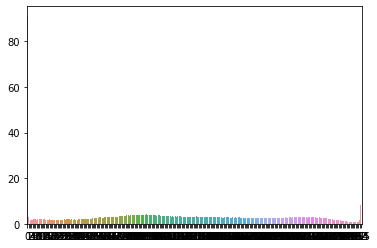

In [18]:
sns.barplot(list(range(len(normal))),normal)

The histogram of data with healthy lungs is overwhelmed by 0.
The histogram of that data without 0:

/mnt/d/linuxEnvs/Dpmg/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

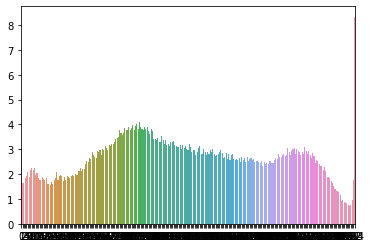

In [19]:
sns.barplot(list(range(len(normal)-1)),normal[1:])

/mnt/d/linuxEnvs/Dpmg/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

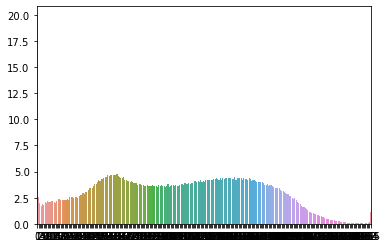

In [20]:
#print(pneumonia)
sns.barplot(list(range(len(pneumonia))),pneumonia)

In [59]:
from sklearn.decomposition import PCA

feat_cols = ['pixel'+str(i) for i in range(65536)]

df = pd.DataFrame(
    [cv2.cvtColor(
        cv2.resize(
            cv2.imread(row.image_path),
            dsize=(256, 256),
            interpolation=cv2.INTER_CUBIC),
        cv2.COLOR_BGR2GRAY).reshape(-1) for _,row in pdm.splited_df_dict['train'][:1000].iterrows()]#.reshape(normal_cnt+pneumonia_cnt,-1)
    ,columns=feat_cols)
df['y'] = pdm.splited_df_dict['train']['target'][:1000]

In [60]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.26185905 0.09969304 0.06878837]


<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

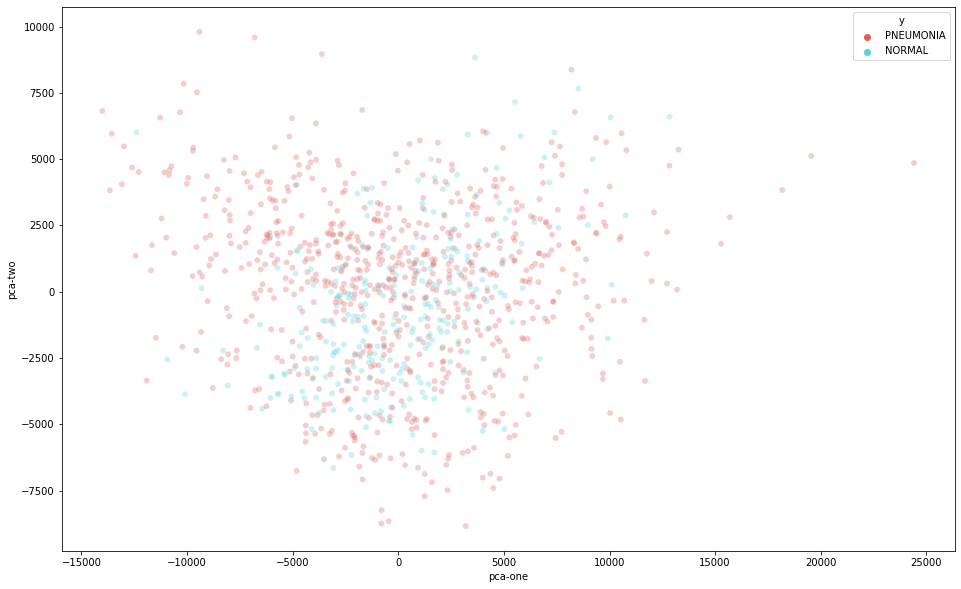

In [63]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)

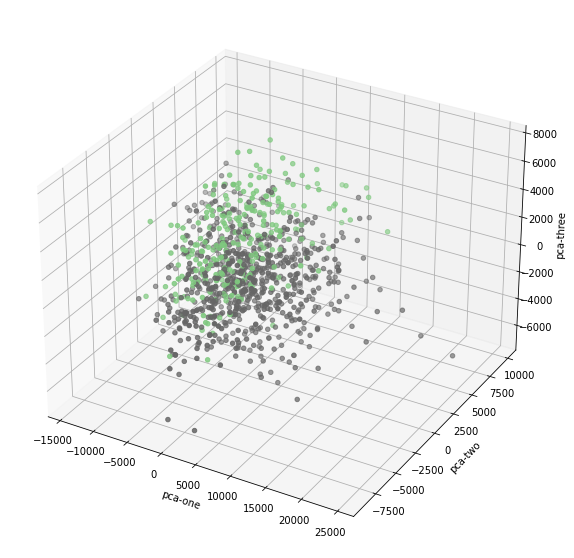

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
df.loc[df['y'] == 'NORMAL', 'y2'] = 0
df.loc[df['y'] != 'NORMAL', 'y2'] = 1
ax.scatter(
    xs=df["pca-one"],
    ys=df["pca-two"],
    zs=df["pca-three"],
    c=df['y2'],
    cmap='Accent'
)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### PDM dataset split - conclusions 
* jest git